In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [75]:
import requests, praw, re, time
from bs4 import BeautifulSoup 
from datetime import datetime 
import pandas as pd 
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
import nltk
from nltk.corpus import stopwords  
from praw.models import MoreComments
from config import indeed_query,r_client_id,r_secret_key,r_dev,r_username,r_pw

In [2]:
reddit = praw.Reddit(
    client_id=r_client_id,
    client_secret=r_secret_key,
    password=r_pw,
    user_agent=f'testscript by u/{r_dev}',
    username=r_dev,
)
print(reddit.user.me())

Jazzy_Danger_1230


In [92]:
def getsymb(s):
    lst = []
    s = re.sub('[^A-Z\s]','', s)   
    for w in s.split(' '):  
        if re.match('\w{2,4}',w): 
            lst.append(w)
    return ','.join(lst)
getsymb('1000$ of BB will take it to 300 billion market. TO THE MOON to see SPY in the 400-405 range Bb & NOK ready for takeoff')

'BB,TO,THE,MOON,SPY,NOK'

In [80]:
dt=datetime.today().strftime("%d-%m-%y")
query = f'{dt}-DDT-24'
submissions=reddit.subreddit("wallstreetbets").search("Daily Discussion Thread", limit=24, sort='new')

In [81]:
lst = []
for submission in submissions:    
    submission.comments.replace_more(limit=0)
    submission.comment_sort = 'new'
    for comment in submission.comments:   
        if isinstance(comment , MoreComments ):
            continue
        score=sia.polarity_scores(comment.body) 
        lst.append(
            {
                'submission_title':submission.title
                ,'cid':comment.id 
                ,'comment_body':comment.body
                ,'time':datetime.utcfromtimestamp(comment.created_utc).strftime('%Y-%m-%d %H:%M:%S')
                ,'author': comment.author
                ,'score':comment.score
                ,'permalink':comment.permalink 
                ,'neg': score['neg']
                ,'pos': score['pos']
                ,'neu': score['neu']
                ,'com': score['compound']
            }
        ) 
df = pd.DataFrame(lst)

In [93]:
df['SYMB'] = df.comment_body.apply(getsymb)  
df['time'] = pd.to_datetime(df.time)
df['date'] = df.time.apply(lambda s: s.strftime('%m-%d-%y'))
df['day'] = df.time.apply(lambda s: s.strftime('%d'))
df['month'] = df.time.apply(lambda s: s.strftime('%m')) 
df['hour'] = df.time.apply(lambda s: s.strftime('%I')) 
df['score'] = df.com.apply( lambda f: 1 if f > 0 else -1 )
df.permalink = 'https://www.reddit.com/' + df.permalink
df.sort_values('time', ascending=False)
df.to_csv(f'data/{query}.csv', index=False)
df1 = pd.read_csv(f'data/{query}.csv')


<AxesSubplot:xlabel='date'>

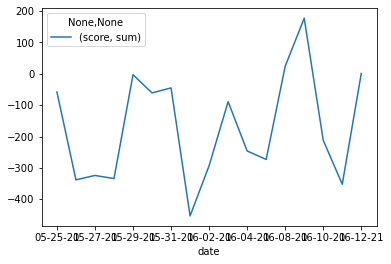

In [96]:
dfg =  df1[['date','score']].groupby('date').agg(['sum'])
dfg.plot(kind='line')

ser = df.author.value_counts()
names = [r for r in list(ser.index.values)] 
df1 = df.loc[ df['author'].isin( names[:5] )  ]  
df1.author = df1.author.apply(lambda x: str(x.name))
df1=df1.groupby('author').describe()

In [70]:
df1=df 
# df1 = df1.loc[ df1['SYMB'].str.contains('BB')  ]
df1 # df1.groupby('day').count()

,submission_title,cid,comment_body,time,author,score,permalink,neg,pos,neu,com,SYMB,day,hour
0,"Daily Popular Tickers Thread for June 11, 2021...",h1dxl2b,Im in all three. Thats what she said! Lets do...,2021-06-11 10:14:20,byrdman3000,160,https://www.reddit.com//r/wallstreetbets/comme...,0.000,0.000,1.000,0.0000,,11,10
1,"Daily Popular Tickers Thread for June 11, 2021...",h1ee0nx,BB/CLOV/AMC I'm all in!,2021-06-11 13:14:51,Stupac1,145,https://www.reddit.com//r/wallstreetbets/comme...,0.000,0.000,1.000,0.0000,BBCLOVAMC,11,01
2,"Daily Popular Tickers Thread for June 11, 2021...",h1eu7lj,CLOV wants to breakout so badly right now.,2021-06-11 15:19:52,SgtMike,113,https://www.reddit.com//r/wallstreetbets/comme...,0.363,0.000,0.637,-0.6113,CLOV,11,03
3,"Daily Popular Tickers Thread for June 11, 2021...",h1etfhu,LAST CHANCE TO GET CLOV AT A DISCOUNT BEFORE 1...,2021-06-11 15:14:09,clarestax,100,https://www.reddit.com//r/wallstreetbets/comme...,0.064,0.205,0.731,0.5917,"LAST,CHANCE,TO,GET,CLOV,AT,DISCOUNT,BEFORE,YOU...",11,03
4,"Daily Popular Tickers Thread for June 11, 2021...",h1edo0k,🤞🍀🤞🍀🤞🍀🍀🤞🍀🤞,2021-06-11 13:11:44,Key-Resolution-2172,80,https://www.reddit.com//r/wallstreetbets/comme...,0.000,0.000,1.000,0.0000,,11,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,"Daily Discussion Thread for June 11, 2021",h1f8jy8,"WKHS up 4%, while $SENS about to be gamma sque...",2021-06-11 17:03:32,repos39,11,https://www.reddit.com//r/wallstreetbets/comme...,0.000,0.091,0.909,0.2023,"WKHS,SENS",11,05
961,"Daily Discussion Thread for June 11, 2021",h1f8l3c,WKHS is either about to blow through 16 or dum...,2021-06-11 17:03:46,m_stew5,12,https://www.reddit.com//r/wallstreetbets/comme...,0.178,0.000,0.822,-0.3818,WKHS,11,05
962,"Daily Discussion Thread for June 11, 2021",h1f8stc,My little WKHS yeeeeeeeee hawwwwwwww!!!\n\nyee...,2021-06-11 17:05:19,tooo_spicy,12,https://www.reddit.com//r/wallstreetbets/comme...,0.000,0.000,1.000,0.0000,WKHS,11,05
963,"Daily Discussion Thread for June 11, 2021",h1f9pdl,Broken that 16$ wall WKHS. That's how you do it,2021-06-11 17:11:51,Bakerstreet221Bo,11,https://www.reddit.com//r/wallstreetbets/comme...,0.256,0.000,0.744,-0.4767,WKHS,11,05


In [ ]:
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn) 
db = client.reddit
collection = db.wsb

In [ ]:
p=0
url = f'https://washingtondc.craigslist.org/d/bicycles/search/bia?s={p}'
soup = BeautifulSoup(requests.get(url).text, "html.parser")

   
    